# **Evaluation - Problem 1**
**Load the data**

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import copy
from tqdm import tqdm
import os
import sys
import json
from collections import Counter

# SELECT WHICH DATA TO LOAD
#20: for 20 sr and 100000 ar
#50: for 50 sr and 100000 ar
#100: for 100 sr and 100000 ar
appendix = str(20)

# define functino to read in data
def fun_load_file(path, name):

    # select current working directory and subfolder to load the files
    current_directory = os.getcwd()
    subfolder_path = path
    file_path = os.path.join(current_directory, subfolder_path, name)

    # load the file
    with open(file_path, 'r') as file:
        return json.load(file)

# load original standardroutes and actual routes
org_standardroutes = fun_load_file(path='../../data', name=str('standard' + appendix + '.json'))
org_actual_routes = fun_load_file(path='../../data', name=str('actual' + appendix + '.json'))

# load parameter dictionary (to have the same parameters for creating new actual routes)
parameter_dictionary = fun_load_file(path='../../data', name='parameter_dictionary.json')

# assign each value to its name in order to be able to use them as variables
for key, value in parameter_dictionary.items():
    if key == 'df_drivers_attributes': locals()[key] = pd.DataFrame(value) #turn dictionary back to DF
    else: locals()[key] = value

# load recommended standardroutes
rec_standardroutes = fun_load_file(path='../../results', name=str('recStandard' + appendix + '.json'))
print('Number of recommended standardroutes:', len(rec_standardroutes))

# run another notebook to load the function compute_similarities() to compute the similarity scores for each standardroute-actual-route-pair
# this notebook also runs the notebook for data generation to load the function show_route() to visualize routes which is part of the similarity score functions
%run "functions_similarity_score_evaluation.ipynb"

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Dennis\\OneDrive\\Dokumente\\03_Master\\06_Kurse\\07_UniTrento\\02_Data_Mining\\03_github\\src\\data_generation_and_evaluation\\../../results\\recStandard20.json'

In [7]:
current_directory = os.getcwd()
subfolder_path = '../../data'
file_path = os.path.join(current_directory, subfolder_path, str('standard' + appendix + '.json'))

# load the file
with open(file_path, 'r') as file:
        rec_standardroutes1 = json.load(file)

In [8]:
rec_standardroutes1

[{'id': 's1',
  'route': [{'from': 'Venezia',
    'to': 'Trento',
    'merchandise': {'Pasta': 21,
     'Meat': 6,
     'Bread': 14,
     'Milk': 25,
     'Carrots': 2}},
   {'from': 'Trento',
    'to': 'Bolzano',
    'merchandise': {'Meat': 9,
     'Milk': 22,
     'Rice': 27,
     'Potatoes': 23,
     'Beer': 28,
     'Carrots': 15,
     'Fish': 6}},
   {'from': 'Bolzano',
    'to': 'Napoli',
    'merchandise': {'Bread': 29,
     'Carrots': 26,
     'Tea': 24,
     'Water': 27,
     'Honey': 30}},
   {'from': 'Napoli',
    'to': 'Bologna',
    'merchandise': {'Pens': 2,
     'Meat': 10,
     'Bananas': 10,
     'Cheese': 27,
     'Water': 11,
     'Yogurt': 13}},
   {'from': 'Bologna',
    'to': 'Genova',
    'merchandise': {'Butter': 27,
     'Apples': 9,
     'Tomatoes': 25,
     'Chocolate': 19,
     'Carrots': 25,
     'Cheese': 4,
     'Yogurt': 4}},
   {'from': 'Genova',
    'to': 'Lecce',
    'merchandise': {'Water': 23,
     'Chocolate': 11,
     'Tomatoes': 3,
     'Butter':

# **A: View Recommended Standardroutes**
**View appearance of cities, products and quantitites in the recommended standardroutes**

In [65]:
def fun_counts(routes):

    # create lists to store all cities, products and quantities of the recommended standardroutes
    cities_sr = []
    products_sr = []
    quantities_sr = []

    # create lists to store the number of trips and products
    num_of_trips = []
    num_of_products = []

    for route in routes:
        # get all cities (starting city first, then all destinations)
        route_c = [route['route'][0]['from']]
        route_c += [i['to'] for i in route['route']]
        num_of_trips.append(len(route_c)-1)

        # get all products (list per trip, then combine lists)
        route_p = [list(i['merchandise'].keys()) for i in route['route']]
        for trip in route_p: num_of_products.append(len(trip))
        route_p = [item for list in route_p for item in list]

        # get all quantities (list per trip, then combine lists)
        route_q = [i['merchandise'].values() for i in route['route']]
        route_q = [item for list in route_q for item in list]
        
        # append lists of route to the lists of all standardroutes
        cities_sr += route_c
        products_sr += route_p
        quantities_sr += route_q
    
    # count the appearances of all values in every list
    city_counts = dict(Counter(cities_sr))
    product_counts = dict(Counter(products_sr))
    quantitiy_counts = dict(Counter(quantities_sr))
    num_of_trips_counts = dict(Counter(num_of_trips))
    num_of_products_counts = dict(Counter(num_of_products))

    return city_counts, product_counts, quantitiy_counts, num_of_trips_counts, num_of_products_counts

org_city_counts, org_product_counts, org_quantitiy_counts, org_num_of_trips_counts, org_num_of_products_counts = fun_counts(org_standardroutes)
rec_city_counts, rec_product_counts, rec_quantitiy_counts, rec_num_of_trips_counts, rec_num_of_products_counts = fun_counts(rec_standardroutes)

In [66]:
org_num_trips_sum = np.sum(list(org_num_of_trips_counts))
rec_num_trips_sum = np.sum(list(rec_num_of_trips_counts))
np.sum(list(org_city_counts.values()))

590

In [67]:
rec_city_counts
org_city_counts
len(standardroutes)
len(rec_standardroutes)
np.sum(list({i: rec_city_counts[i] * (org_num_trips_sum/rec_num_trips_sum) for i in rec_city_counts}.values()))

294.4444444444444

In [68]:
{i: rec_city_counts[i] / org_city_counts[i] for i in rec_city_counts.keys()}

{'Pisa': 0.5666666666666667,
 'Trento': 0.5405405405405406,
 'Modena': 0.6333333333333333,
 'Padova': 0.65625,
 'Bologna': 0.6666666666666666,
 'Venezia': 0.52,
 'Udine': 0.625,
 'Bolzano': 0.5416666666666666,
 'Firenze': 0.9047619047619048,
 'Rome': 0.5,
 'Monza': 0.24324324324324326,
 'Genova': 0.4473684210526316,
 'Verona': 0.40625,
 'Bergamo': 0.3125,
 'Torino': 0.7037037037037037,
 'Milano': 0.7037037037037037,
 'Siena': 0.88,
 'Napoli': 0.6296296296296297,
 'Lecce': 0.38461538461538464,
 'Palermo': 0.2894736842105263}

In [69]:
# city_pct_change = (rec_city_counts / org_city_counts) - 1
# product_pct_change = (rec_product_counts / org_product_counts) - 1
# quantity_pct_change = (rec_quantitiy_counts / org_quantitiy_counts) - 1

In [70]:
# function to plot the counts
def fun_plot_appearances(name, counts, color):

    # create barplot to view the number of appearances
    plt.figure(figsize=(10, 4))
    plt.bar(x=counts.keys(), height=counts.values(), color=color)

    # set title, edit axis and add legend
    plt.title('Number of appearances per {} in rec standardroutes'.format(name), fontsize=15, fontweight='bold')
    plt.ylabel('APPEARANCES', fontsize=10, fontweight='bold')
    plt.xlabel(name.upper(), fontsize=10, fontweight='bold')
    if isinstance(list(counts.keys())[0], str): plt.xticks(rotation=60)

    # grid lines
    plt.grid(True, axis='y')

    return plt.show()

# # execute function for a all count dicitonary
fun_plot_appearances('city', city_pct_change, 'indigo')
fun_plot_appearances('product', product_pct_change, 'seagreen')
fun_plot_appearances('quantity', quantity_pct_change, 'orangered')
fun_plot_appearances('number of trips', num_of_trips_counts, 'gray')
fun_plot_appearances('number of products', num_of_products_counts, 'slategrey')

NameError: name 'city_pct_change' is not defined

In [ ]:
for i in rec_standardroutes: show_route(i)

id:s1, route:
     {'from': 'Pisa', 'to': 'Trento', 'merchandise': {'Honey': 11, 'Carrots': 4, 'Pens': 10, 'Water': 5, 'Bananas': 10, 'Cheese': 12}}
     {'from': 'Trento', 'to': 'Modena', 'merchandise': {'Honey': 2, 'Carrots': 9, 'Rice': 2, 'Fish': 11, 'Beer': 5}}
     {'from': 'Modena', 'to': 'Padova', 'merchandise': {'Apples': 2, 'Meat': 12, 'Carrots': 5, 'Tea': 11, 'Water': 10, 'Bananas': 13, 'Cheese': 7}}
     {'from': 'Padova', 'to': 'Bologna', 'merchandise': {'Apples': 5, 'Honey': 4, 'Pasta': 9, 'Cheese': 5, 'Bread': 5}}


id:s2, route:
     {'from': 'Pisa', 'to': 'Venezia', 'merchandise': {'Meat': 20, 'Yogurt': 8, 'Potatoes': 23, 'Beer': 28, 'Cheese': 2}}
     {'from': 'Venezia', 'to': 'Udine', 'merchandise': {'Meat': 8, 'Carrots': 9, 'Yogurt': 6, 'Pens': 9, 'Chocolate': 11, 'Cheese': 6}}
     {'from': 'Udine', 'to': 'Modena', 'merchandise': {'Honey': 12, 'Meat': 11, 'Carrots': 6, 'Potatoes': 10}}
     {'from': 'Modena', 'to': 'Padova', 'merchandise': {'Apples': 2, 'Meat': 12, 

### **B) Create the same amount of actual routes again with the recommended standardroutes**

In [80]:
# compute how many routes to generate
number_of_actual_routes = len(org_actual_routes)
jobs_per_route = int(number_of_actual_routes / len(rec_standardroutes))

# create new actual routes
rec_actual_routes = fun_aroutes(input_sr=rec_standardroutes, driver_given=False, prints=True, debug=False)

Processing:  87%|████████▋ | 58/67 [01:59<00:16,  1.80s/iteration]

No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in

Processing:  88%|████████▊ | 59/67 [02:00<00:13,  1.74s/iteration]

No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.
No trip in the route.


Processing: 100%|██████████| 67/67 [02:16<00:00,  2.04s/iteration]


In [79]:
print(len(org_actual_routes))
len(rec_actual_routes)

93

### **Compute similarity scores - for orginial standardroutes and recommended ones**

In [81]:
# compute similarity scores with original standardroutes
print('-------------------------Original standardroutes-------------------------')
org_scores = compute_similarites(input_sr=org_standardroutes, input_ar=org_actual_routes, prints=False)

# compute similarity scores with recommended standardroutes
print('------------------------Recommended standardroutes-----------------------')
rec_scores = compute_similarites(input_sr=rec_standardroutes, input_ar=rec_actual_routes, prints=False)

-------------------------Original standardroutes-------------------------


Processing: 100%|██████████| 100000/100000 [01:40<00:00, 993.22iteration/s]



All scores successfully computed.
Mean similarity score: 0.6075
------------------------Recommended standardroutes-----------------------


Processing: 100%|██████████| 99861/99861 [01:11<00:00, 1395.42iteration/s]


All scores successfully computed.
Mean similarity score: 0.6731


### **Analyse the similarity scores**

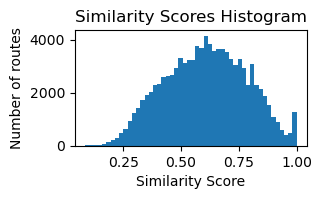

In [82]:
# plot a histogram to show the distribution of the similarity scores between 0 and 1
values = np.array([i['score'] for i in org_scores])
plt.figure(figsize=(3, 1.5))
plt.hist(values, density=False, bins=50)
plt.ylabel('Number of routes')
plt.xlabel('Similarity Score')
plt.title('Similarity Scores Histogram')
plt.show()

**View the similarity scores for each driver separately**

In [83]:
### ORIGINAL STANDARDROUTES
# dictionary to store the mean similarity score for each driver (given all original standardroutes)
mean_org_scores_d = {}

# loop to get for each driver the actual routes computed with the original standardroutes and compute the mean similarity
for driver in drivers:

    # extract the driver's similarity scores of all the similarity scores computed before and take the mean
    mean = np.mean([i['score'] for i in org_scores if i['driver'] == driver])

    # append the driver id and mean score to the dictionary
    mean_org_scores_d.update({driver: mean})

### RECOMMENDED STANDARDROUTES
# dictionary to store the mean similarity score for each driver (given all recommended standardroutes)
mean_rec_scores_d = {}

# loop to get for each driver the actual routes computed with all recommended standardroutes and compute the mean similarity
for driver in drivers:

    # extract the driver's similarity scores of all the similarity scores computed before and take the mean
    mean = np.mean([i['score'] for i in rec_scores if i['driver'] == driver])

    # append the driver id and mean score to the dictionary
    mean_rec_scores_d.update({driver: mean})

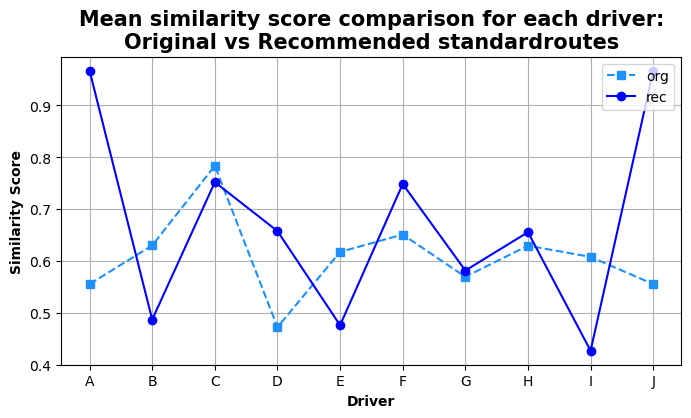

In [84]:
# funciton to compare similarity scores for each driver
def fun_plot_scores(scores1, scores2, color1, color2, label1, label2, title):

    # create plot to compare similarity scores
    plt.figure(figsize=(8, 4))
    plt.plot(drivers, scores1.values(), marker='s', linestyle='--', color=color1, label=label1)
    plt.plot(drivers, scores2.values(), marker='o', linestyle='-', color=color2, label=label2)

    # set title, edit axis and add legend
    plt.title(title, fontsize=15, fontweight='bold')
    plt.ylabel('Similarity Score', fontsize=10, fontweight='bold')
    plt.xlabel('Driver', fontsize=10, fontweight='bold')
    plt.legend(loc='upper right')

    # grid lines
    plt.grid(True)

    return plt.show()

# execute function to compare the scores of original and recommended standardroutes
fun_plot_scores(scores1=mean_org_scores_d, scores2=mean_rec_scores_d,
                color1='dodgerblue', color2='blue',
                label1='org', label2='rec',
                title='Mean similarity score comparison for each driver:\nOriginal vs Recommended standardroutes')

In [85]:
# # check if any similarity is zero and view the combinations with less than 0.3 similarity score
# print('Is any similarity score zero:', np.any(values == 0))
# #display([i for i in values if i < 0.3][:10])

# # view the combination with the lowest similarity score
# idx_min = np.argmin(values)
# lowest_score = [i for i in org_scores if i['id'] == str('a' + str(idx_min+1))][0]
# standardroute = [i for i in org_standardroutes if i['id'] == lowest_score['sroute']][0]
# actual_route = [i for i in org_actual_routes if i['id'] == lowest_score['id']][0]
# print("\nLowest score by standardroute '{}' and actual route '{}' from driver '{}' with {} similarity.".format(standardroute['id'], actual_route['id'], actual_route['driver'], np.round(np.min(values), 4)))

# # view details
# fun_similarity_score(route1=standardroute, route2=actual_route, prints=True)

**View the similarity scores for each standardroute separately**


In [86]:
# # plot a histogram for every standardroute to show the distribution
# standardroute_ids = [i['id'] for i in org_standardroutes]

# # define subplot grid
# fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 12))
# plt.subplots_adjust(hspace=0.5)
# fig.suptitle("Similarity Score distribution per standardroute", fontsize=18, y=0.95)

# # loop through standardroutes and axes
# for id, ax in zip(standardroute_ids, axs.ravel()):
#     values = [i['score'] for i in org_scores if i['sroute'] == id]
#     ax.hist(values, density=False, bins=50)
#     ax.set_ylabel('Number of routes')
#     ax.set_xlabel('Similarity Score')
#     ax.set_title(f'Standardroute {id}')

# plt.show()

**View the similarity scores for each driver separately**

In [87]:
# # plot a histogram for every driver to show the distribution
# drivers = np.sort(list(set([i['driver'] for i in org_actual_routes])))

# # define subplot grid
# fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(22, 6))
# plt.subplots_adjust(hspace=0.5)
# fig.suptitle("Similarity Score distribution per driver", fontsize=18, y=0.95)

# # loop through drivers and axes
# for driver, ax in zip(drivers, axs.ravel()):
#     values = [i['score'] for i in org_scores if i['driver'] == driver]
#     ax.hist(values, density=False, bins=50)
#     ax.set_ylabel('Number of routes')
#     ax.set_xlabel('Similarity Score')
#     ax.set_title(f'driver {driver}')

# plt.show()

# **Evaluation - Problem 2**

### **Check whether the attributes of each driver are visible in the recommended standardroutes**

In [88]:
# select file path for recommended standardroutes of the drivers
subfolder_path = 'results'
file_path = os.path.join(current_directory, subfolder_path, str('driver' + appendix + '.json'))
with open(file_path, 'r') as file:
    rec_drivers = json.load(file)

display(rec_drivers)

[{'driver': 'A', 'routes': ['s11', 's10', 's65', 's63', 's5']},
 {'driver': 'B', 'routes': ['s2', 's13', 's65', 's98', 's84']},
 {'driver': 'C', 'routes': ['s65', 's63', 's10', 's2', 's5']},
 {'driver': 'D', 'routes': ['s13', 's5', 's98', 's75', 's74']},
 {'driver': 'E', 'routes': ['s65', 's5', 's13', 's75', 's10']},
 {'driver': 'F', 'routes': ['s65', 's63', 's13', 's2', 's5']},
 {'driver': 'G', 'routes': ['s96', 's74', 's19', 's75', 's1']},
 {'driver': 'H', 'routes': ['s65', 's2', 's63', 's13', 's75']},
 {'driver': 'I', 'routes': ['s65', 's2', 's50', 's93', 's13']},
 {'driver': 'J', 'routes': ['s11', 's5', 's10', 's63', 's65']}]

In [89]:
display(df_drivers_attributes, driver_cities, driver_products)

,likes short routes,likes long routes,likes a city,dislikes a city,likes few products,likes many products,likes a product,dislikes a product,likes high quantities,likes low quantities
driver_A,Yes,-,-,-,-,-,-,-,-,Yes
driver_B,-,Yes,-,-,-,Yes,-,-,-,-
driver_C,-,-,Yes,-,-,-,-,Yes,-,-
driver_D,-,-,Yes,Yes,-,-,-,-,-,Yes
driver_E,-,Yes,-,-,Yes,-,-,-,-,-
driver_F,Yes,-,-,-,-,Yes,-,-,-,-
driver_G,Yes,-,-,-,-,-,Yes,-,-,-
driver_H,-,-,-,Yes,-,Yes,-,Yes,-,-
driver_I,-,-,-,-,-,-,Yes,-,Yes,-
driver_J,Yes,-,-,-,-,-,-,-,-,Yes


{'driver_C': ['Trento', 'Padova'],
 'driver_D': ['Milano', 'Palermo', 'Lecce'],
 'driver_E': ['Rome', 'Trento'],
 'driver_H': ['Lecce', 'Palermo']}

{'driver_C': ['Water'],
 'driver_G': ['Beer', 'Cheese'],
 'driver_H': ['Milk', 'Water'],
 'driver_I': ['Chocolate', 'Honey']}

### **Compare Similarity Scores**

**Create new actual routes for each driver with only his 5 recommended standardroutes and compute the mean similarity scores**

In [90]:
# define how many actual routes should be created for each of the 5 standardroutes for each driver
jobs_per_route = 100

# calculate the amount of actual routes per driver and in total
number_of_actual_routes = jobs_per_route * 5 #5 recommended standardroutes for each driver
print('Number of actual routes per driver: {}'.format(number_of_actual_routes))
print('Number of actual routes in total: {}'.format(number_of_actual_routes*len(drivers)))

Number of actual routes per driver: 500
Number of actual routes in total: 5000


In [91]:
# dictionary to store the mean similarity score for each driver (given only the 5 recommended standardroutes)
mean_rec5_scores_d = {}

# loop to create for each driver new actual routes with its 5 recommended standardroutes and compute the mean similarity
for driver in tqdm(drivers):
    
    # select the ids of the 5 recommended standardroutes for the driver
    id_rec5_sr = [rec['routes'] for rec in rec_drivers if rec['driver'] == driver][0]
    #print(id_rec5_sr)
    
    # extract the routes with the ids out of all original standardroutes
    rec5_standardroutes = []
    for rec in id_rec5_sr:
        rec5_standardroutes.append([sr for sr in org_standardroutes if sr['id'] == rec][0])
    #for i in rec5_standardroutes: show_route(i)
    
    # create the actual routes for the driver
    actual_routes_driver = fun_aroutes(input_sr=rec5_standardroutes, driver_given=driver, prints=False, bar=False)

    # compute the similarity scores of all the just generated actual routes of the driver with its corresponding 5 recommended standardroutes for the driver
    scores_driver = compute_similarites(input_sr=rec5_standardroutes, input_ar=actual_routes_driver, prints=False, bar=False)

    # compute the mean similarity score of all scores for the driver
    mean = np.mean([i['score'] for i in scores_driver])

    # append the driver id and mean score to the dictionary
    mean_rec5_scores_d.update({driver: mean})

100%|██████████| 10/10 [00:15<00:00,  1.55s/it]


**Plot results**

Mean similarity score all standardroutes: 0.607
Mean similarity score recommended 5 standardroutes: 0.6227


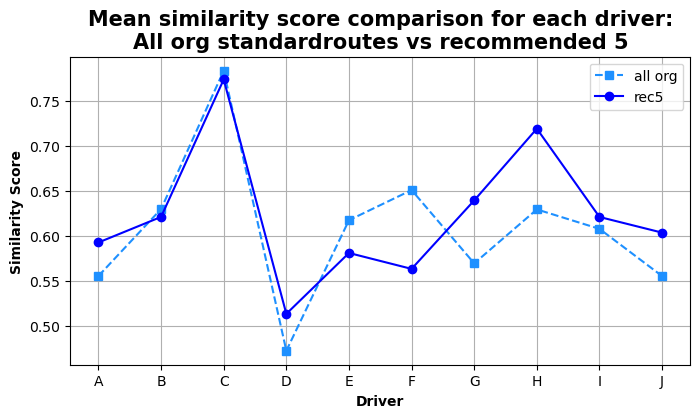

In [92]:
# compare mean similarity scores
print('Mean similarity score all standardroutes:', np.round(np.mean(list(mean_org_scores_d.values())), 4))
print('Mean similarity score recommended 5 standardroutes:', np.round(np.mean(list(mean_rec5_scores_d.values())), 4))

# use previous defined plot funciton to compare the mean scores for the drivers
fun_plot_scores(scores1=mean_org_scores_d, scores2=mean_rec5_scores_d, 
                color1='dodgerblue', color2='blue',
                label1='all org', label2='rec5',
                title='Mean similarity score comparison for each driver:\nAll org standardroutes vs recommended 5')

# **Evaluation - Problem 3**

In [93]:
# select file path for recommended standardroutes
subfolder_path = 'results'
file_path = os.path.join(current_directory, subfolder_path, str('perfectRoute' + appendix + '.json'))
with open(file_path, 'r') as file:
    perfectRoute = json.load(file)

#for i in perfectRoute: show_route(i)

In [94]:
# append an id to each perfect route
for idx, route in enumerate(perfectRoute):
    route.update({'id':idx+1})

In [95]:
# define how many actual routes should be created for each of the 5 standardroutes for each driver
jobs_per_route = 100

# calculate the amount of actual routes per driver and in total
number_of_actual_routes = jobs_per_route #only one perfect route for each driver
print('Number of actual routes per driver: {}'.format(number_of_actual_routes))
print('Number of actual routes in total: {}'.format(number_of_actual_routes*len(drivers)))

Number of actual routes per driver: 100
Number of actual routes in total: 1000


**Create new actual routes for each driver with his perfect route and compute the mean similarity scores**

In [96]:
# dictionary to store the mean similarity score for each driver
perfect_scores_d = {}

# loop to create for each driver new actual routes with its perfect standardroute and compute the similarity
for driver in tqdm(drivers):
    
    # select the driver's perfect route
    perfect_standardroute = [i for i in perfectRoute if i['driver'] == driver]
    #print(perfect_standardroute)
    
    # create the actual routes for the driver
    actual_routes_driver = fun_aroutes(input_sr=perfect_standardroute, driver_given=driver, prints=False, bar=False)

    # compute the similarity scores of all the just generated actual routes of the driver with its corresponding 5 recommended standardroutes for the driver
    scores_driver = compute_similarites(input_sr=perfect_standardroute, input_ar=actual_routes_driver, prints=False, bar=False)

    # compute the mean similarity score of all scores for the driver
    mean = np.mean([i['score'] for i in scores_driver])

    # append the driver id and mean score to the dictionary
    perfect_scores_d.update({driver: mean})

100%|██████████| 10/10 [00:01<00:00,  6.04it/s]


Mean similarity score all standardroutes: 0.607
Mean similarity score perfect standardroute: 0.9678


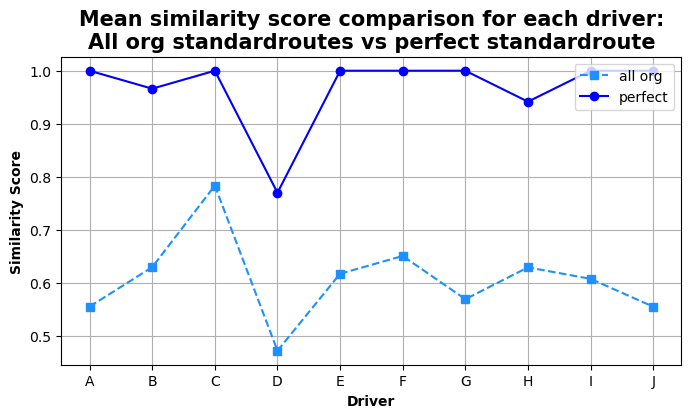

In [97]:
# compare mean similarity scores
print('Mean similarity score all standardroutes:', np.round(np.mean(list(mean_org_scores_d.values())), 4))
print('Mean similarity score perfect standardroute:', np.round(np.mean(list(perfect_scores_d.values())), 4))

# use previous defined plot funciton to compare the mean scores for the drivers
fun_plot_scores(scores1=mean_org_scores_d, scores2=perfect_scores_d, 
                color1='dodgerblue', color2='blue',
                label1='all org', label2='perfect',
                title='Mean similarity score comparison for each driver:\nAll org standardroutes vs perfect standardroute')